In [1]:
import numpy as np
import pandas as pd
import os
#import matplotlib.pyplot as plt
import cv2
#import csv
#from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.optimizers import rmsprop
#import random
#from PIL import Image
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
np.random.seed(1)


# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []
train_labels = []
shape = (50, 50)
train_path = 'Training_Set//GTSRB//Final_Training//Images'
for c in range(43):
        sub_dir = train_path + '//' + format(c, '05d')  # subdirectory for class
        for filename in os.listdir(sub_dir):
            if filename.split('.')[1] == 'ppm':
                img = cv2.imread(os.path.join(sub_dir, filename))
                train_labels.append(c)
                # Resize all images to a specific shape
                img = cv2.resize(img, shape)

                train_images.append(img)
# Converting train_images to array
train_images = np.array(train_images)
# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values


# Splitting Training data into train and validation dataset
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=1)

In [3]:
model = Sequential()
model.add(BatchNormalization())
model.add(Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu')) 
model.add(Dropout(0.3)) #Overfitting vermeiden
model.add(Dense(43, activation='softmax'))
model.compile(
loss='categorical_crossentropy',
metrics=['acc'],
optimizer='RMSprop')

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
history = model.fit(train_images, train_labels, epochs=30,batch_size=512,validation_data=(x_val,y_val))

Train on 39209 samples, validate on 9803 samples
Epoch 1/30
39209/39209 [==============================] - 6s 156us/step - loss: 0.0652 - acc: 0.9856 - val_loss: 0.0307 - val_acc: 0.9945
Epoch 2/30
39209/39209 [==============================] - 6s 156us/step - loss: 0.0595 - acc: 0.9875 - val_loss: 0.0442 - val_acc: 0.9907
Epoch 3/30
39209/39209 [==============================] - 6s 156us/step - loss: 0.0661 - acc: 0.9863 - val_loss: 0.0768 - val_acc: 0.9824
Epoch 4/30
39209/39209 [==============================] - 6s 155us/step - loss: 0.0630 - acc: 0.9863 - val_loss: 0.0714 - val_acc: 0.9817
Epoch 5/30
39209/39209 [==============================] - 6s 152us/step - loss: 0.0698 - acc: 0.9860 - val_loss: 0.0408 - val_acc: 0.9914
Epoch 6/30
39209/39209 [==============================] - 6s 152us/step - loss: 0.0528 - acc: 0.9887 - val_loss: 0.0591 - val_acc: 0.9899
Epoch 7/30
39209/39209 [==============================] - 6s 152us/step - loss: 0.0733 - acc: 0.9855 - val_loss: 0.0292 - v

In [18]:
mae_history = history.history['val_loss']
all_mae_histories = []

all_mae_histories.append(mae_history)

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(30)]

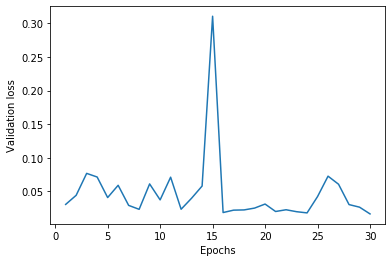

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()